In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Veriyi yükledik
file_path = '/content/hospital_appointment_data.csv'


data = pd.read_csv(file_path)

# Verini İlk birkaç satırını inceledik
print(data.head())


   AppointmentID  PatientID AppointmentDate AppointmentTime AppointmentDay  \
0              1       1102      2023-01-01        15:00:00         Sunday   
1              2       1435      2023-01-02        11:00:00         Monday   
2              3       1860      2023-01-03        09:00:00        Tuesday   
3              4       1270      2023-01-04        09:00:00      Wednesday   
4              5       1106      2023-01-05        17:30:00       Thursday   

   PatientAge PatientGender      Disease  DoctorID  PreviousNoShow  \
0          78          Male   Pediatrics       110               3   
1          33          Male      General       152               3   
2          35          Male  Orthopedics       145               0   
3           5        Female   Cardiology       129               1   
4          38        Female   Pediatrics       156               0   

  SMSReminder NoShow  
0         Yes    Yes  
1         Yes     No  
2         Yes    Yes  
3         Yes     

In [ ]:
# Eksik verilerimizi kontrol ettik
missing_data = data.isnull().sum()
print(missing_data)

# Veri türlerimizi kontrol edelim
data.info()


AppointmentID      0
PatientID          0
AppointmentDate    0
AppointmentTime    0
AppointmentDay     0
PatientAge         0
PatientGender      0
Disease            0
DoctorID           0
PreviousNoShow     0
SMSReminder        0
NoShow             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AppointmentID    1000 non-null   int64 
 1   PatientID        1000 non-null   int64 
 2   AppointmentDate  1000 non-null   object
 3   AppointmentTime  1000 non-null   object
 4   AppointmentDay   1000 non-null   object
 5   PatientAge       1000 non-null   int64 
 6   PatientGender    1000 non-null   object
 7   Disease          1000 non-null   object
 8   DoctorID         1000 non-null   int64 
 9   PreviousNoShow   1000 non-null   int64 
 10  SMSReminder      1000 non-null   object
 11  NoShow           1000 non-null   object

In [ ]:
# AppointmentDate ve AppointmentTime sütunlarını dönüştürelim
data['AppointmentDate'] = pd.to_datetime(data['AppointmentDate'])
data['AppointmentTime'] = pd.to_datetime(data['AppointmentTime'], format='%H:%M:%S').dt.time

# Kategorik değişkenleri sayısal değerlere dönüştürdük
label_encoder = LabelEncoder()
data['PatientGender'] = label_encoder.fit_transform(data['PatientGender'])
data['Disease'] = label_encoder.fit_transform(data['Disease'])
data['SMSReminder'] = label_encoder.fit_transform(data['SMSReminder'])
data['NoShow'] = label_encoder.fit_transform(data['NoShow'])

# Dönüşümlerin başarılı olup olmadığını kontrol ettik
print(data.head())


   AppointmentID  PatientID AppointmentDate AppointmentTime AppointmentDay  \
0              1       1102      2023-01-01        15:00:00         Sunday   
1              2       1435      2023-01-02        11:00:00         Monday   
2              3       1860      2023-01-03        09:00:00        Tuesday   
3              4       1270      2023-01-04        09:00:00      Wednesday   
4              5       1106      2023-01-05        17:30:00       Thursday   

   PatientAge  PatientGender  Disease  DoctorID  PreviousNoShow  SMSReminder  \
0          78              1        4       110               3            1   
1          33              1        1       152               3            1   
2          35              1        3       145               0            1   
3           5              0        0       129               1            1   
4          38              0        4       156               0            1   

   NoShow  
0       1  
1       0  
2       1  
3 

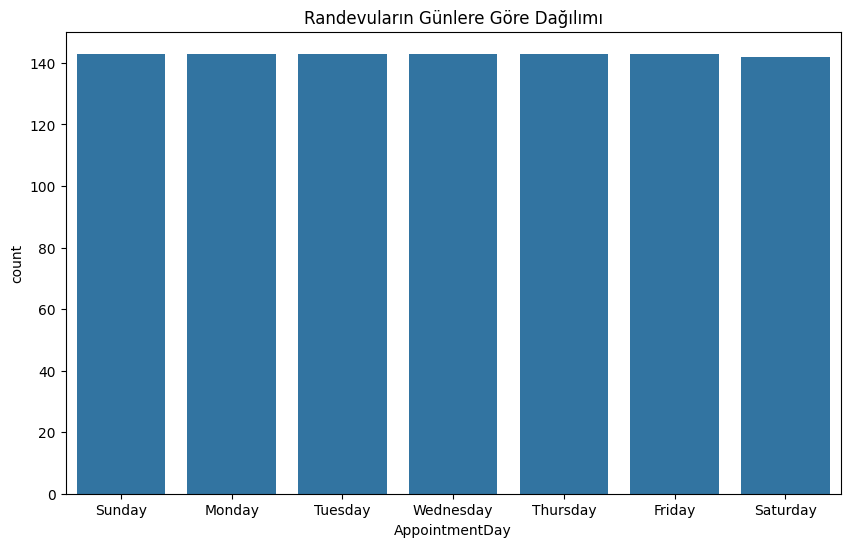

In [ ]:
# Randevu dağılımını görselleşttirdik
plt.figure(figsize=(10, 6))
sns.countplot(x='AppointmentDay', data=data)
plt.title('Randevuların Günlere Göre Dağılımı')
plt.show()





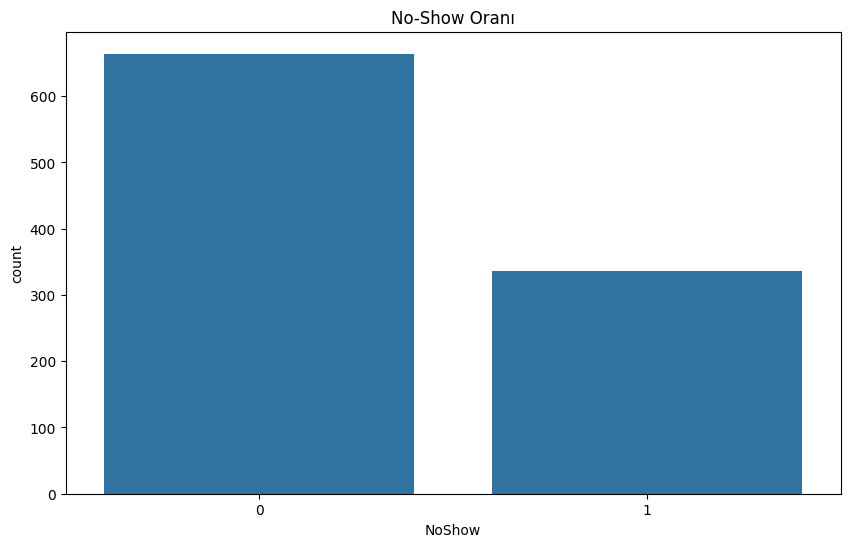

In [ ]:
# No-show oranını görselleştirelim
plt.figure(figsize=(10, 6))
sns.countplot(x='NoShow', data=data)
plt.title('No-Show Oranı')
plt.show()

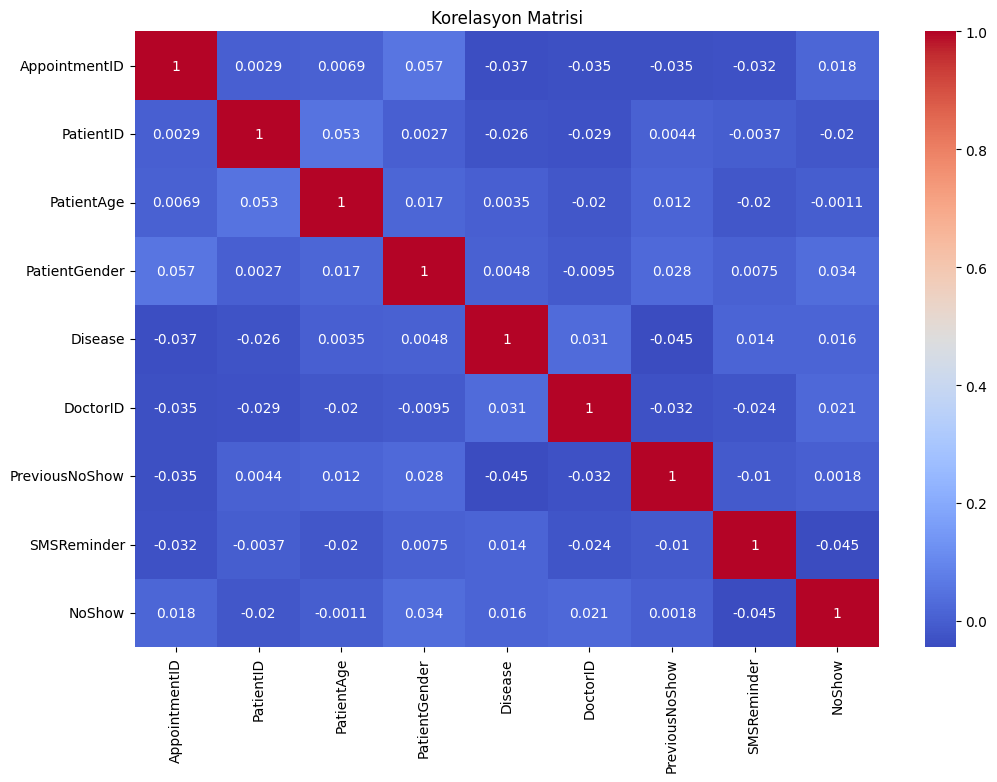

In [ ]:
# Sadece sayısal sütunları seçtik
numeric_data = data.select_dtypes(include=[np.number])

# Korelasyon matrisini oluşturduk
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()


In [ ]:
# Özellik ve hedef değişkenlerimizi belirledik
X = data.drop(['AppointmentID', 'PatientID', 'AppointmentDate', 'AppointmentTime', 'NoShow'], axis=1)
y = data['NoShow']

In [ ]:
# Veri setini eğitim ve test kümelerine ayırdık
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# OneHotEncoder oluşturduk
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)





In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_encoded, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
#Sayısal Olmayan verileri sayısala  dönüştürmek


# AppointmentDate ve AppointmentTime sütunlarını dönüştürdük
data['AppointmentDate'] = pd.to_datetime(data['AppointmentDate'])
data['AppointmentTime'] = pd.to_datetime(data['AppointmentTime'], format='%H:%M:%S').dt.time

# Kategorik değişkenleri sayısal değerlere dönüştürdük
label_encoder = LabelEncoder()
data['PatientGender'] = label_encoder.fit_transform(data['PatientGender'])
data['Disease'] = label_encoder.fit_transform(data['Disease'])
data['SMSReminder'] = label_encoder.fit_transform(data['SMSReminder'])
data['NoShow'] = label_encoder.fit_transform(data['NoShow'])

# AppointmentDay sütununu sayısal değerlere dönüştürdük
data['AppointmentDay'] = label_encoder.fit_transform(data['AppointmentDay'])

# Özellik ve hedef değişkenleri belirledik
X = data.drop(['AppointmentID', 'PatientID', 'AppointmentDate', 'AppointmentTime', 'NoShow'], axis=1)
y = data['NoShow']

# OneHotEncoder kullanarak kategorik değişkenleri dönüştürdük
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X).toarray()

# Veri setini eğitim ve test kümelerine ayırdık
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model seçimi ve eğitimi (Logistic Regression örneği)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)




LogisticRegression(max_iter=1000)

In [ ]:
# Modeli değerlendirdik
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Doğruluk: {accuracy}")
print(f"Hassasiyet: {precision}")
print(f"Geri Çağırma: {recall}")

Doğruluk: 0.665
Hassasiyet: 0.3939393939393939
Geri Çağırma: 0.21666666666666667
